### Importing the packages.

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random as rn
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.metrics import (confusion_matrix, precision_recall_curve)

### List of files required.

In [2]:
files = glob.glob(os.path.join('./datasets_used/', "csv_result-PC*.csv"), recursive = True)

In [3]:
files

['./datasets_used/csv_result-PC4.csv',
 './datasets_used/csv_result-PC2.csv',
 './datasets_used/csv_result-PC3.csv',
 './datasets_used/csv_result-PC1.csv']

#### Since we have four files, we are going to check the data of each file and if they are consistent, we will obtaine a combined dataframe with data from all the files.

### Obtaining each file data seperately to examine.

In [4]:
df_seperate = []

In [5]:
for i in range(len(files)):
    df_seperate.append(pd.read_csv(files[i]))

In [6]:
df_seperate[0]

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1453          0             3           0                     0             0   
1454          0             3           0                     0             0   
1455          0             1           1                     0             0   
1456          1             3           1                     0             0   
1457          1             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1453                4                      2                0.29   
1454                4                      2                0.33   
1455                0                      1                0.07   
1456                4                      2                0.40   
1457                0                      1                0.05   

      DECISION_COUNT  DECISION_DENSITY  ...  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0                 12              2.17  ...                             0.11   
1                  0              0.00  ...                             0.06   
2                  2              2.00  ...                             0.08   
3                  2              2.00  ...                             0.07   
4                  0              0.00  ...                             0.10   
...              ...               ...  ...                              ...   
1453               2              2.00  ...                             0.22   
1454               2              2.00  ...                             0.25   
1455               0              0.00  ...                             0.06   
1456               2              2.00  ...                             0.25   
1457               0              0.00  ...                             0.05   

      NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0               42             78                   23                    16   
1                8             30                    4                    10   
2               12             25                    8                    12   
3               12             26                    8                    12   
4                4              8                    3                     7   
...            ...            ...                  ...                   ...   
1453            17             23                    5                     7   
1454            13             17                    5                     7   
1455            29             76                    3                     8   
1456            10             14                    6                    10   
1457            36            131                    2                     5   

      NUMBER_OF_LINES  PATHOLOGICAL_COMPLEXITY  PERCENT_COMMENTS  LOC_TOTAL  \
0                  71                        1             31.91         36   
1                  18                        1             22.22          7   
2                  24                        1           

In [7]:
df_seperate[1]

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0             0             7           1                    14             0   
1             0             7           2                    14             0   
2             0             7           0                     4             0   
3             0             3           0                     1             0   
4             0             3           0                     1            14   
...         ...           ...         ...                   ...           ...   
5584          0             1           0                     1             0   
5585          0             1           1                     1             0   
5586          0             1           1                     0             0   
5587          0             1           1                     0             0   
5588          0             1           1                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  12                      4                0.24   
1                  12                      4                0.24   
2                  12                      4                0.80   
3                   4                      2                1.00   
4                   4                      2                1.00   
...               ...                    ...                 ...   
5584                0                      1                0.50   
5585                0                      1                0.50   
5586                0                      1                1.00   
5587                0                      1                1.00   
5588                0                      1                1.00   

      DECISION_COUNT DECISION_DENSITY  ...  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0                  6                2  ...                             0.20   
1                  6                2  ...                             0.20   
2                  6                2  ...                             0.50   
3                  2                2  ...                             0.50   
4                  2                2  ...                             0.11   
...              ...              ...  ...                              ...   
5584               0                ?  ...                             0.25   
5585               0                ?  ...                             0.25   
5586               0                ?  ...                             1.00   
5587               0                ?  ...                             1.00   
5588               0                ?  ...                             1.00   

      NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0               37             54                    9                    14   
1               39             56                   10                    14   
2                6             11                    3                     7   
3                2              5                    2                     5   
4                2              5                    2                     5   
...            ...            ...                  ...                   ...   
5584             1              3                    1                     3   
5585             2              4                    2                     4   
5586             0              0                    0                     0   
5587             0              0                    0                     0   
5588             1              0                    1                     0   

      NUMBER_OF_LINES  PATHOLOGICAL_COMPLEXITY  PERCENT_COMMENTS  LOC_TOTAL  \
0                  20                        1             82.35         17   
1                  20                        1             82.35         17   
2                   8                        1             80.00     

In [8]:
df_seperate[2]

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            14            11           4                     3             0   
1             6             3           1                     1             3   
2             3             1           0                     0             0   
3             2             1           1                     0             0   
4             2             1           1                     0             0   
...         ...           ...         ...                   ...           ...   
1558          0             3           0                     0             0   
1559          0             3           0                     0             0   
1560          0             1           1                     0             0   
1561          1             3           1                     0             0   
1562          1             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  20                      6                0.23   
1                   4                      2                0.50   
2                   0                      1                0.14   
3                   0                      1                0.50   
4                   0                      1                0.50   
...               ...                    ...                 ...   
1558                4                      2                0.25   
1559                4                      2                0.29   
1560                0                      1                0.06   
1561                4                      2                0.33   
1562                0                      1                0.05   

      DECISION_COUNT DECISION_DENSITY  ...  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0                 10                2  ...                             0.15   
1                  2                2  ...                             0.14   
2                  0                ?  ...                             0.09   
3                  0                ?  ...                             0.20   
4                  0                ?  ...                             0.20   
...              ...              ...  ...                              ...   
1558               2                2  ...                             0.22   
1559               2                2  ...                             0.25   
1560               0                ?  ...                             0.06   
1561               2                2  ...                             0.25   
1562               0                ?  ...                             0.05   

      NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0               51             59                   27                    15   
1                4              7                    4                     6   
2               16             18                   10                     5   
3                3              4                    3                     4   
4                3              7                    3                     6   
...            ...            ...                  ...                   ...   
1558            23             24                    8                     8   
1559            17             18                    6                     8   
1560            73             76                   18                     8   
1561            10             15                    6                    11   
1562           130            131                   24                     5   

      NUMBER_OF_LINES  PATHOLOGICAL_COMPLEXITY  PERCENT_COMMENTS  LOC_TOTAL  \
0                  41                        1             11.54         26   
1                  14                        1             57.14          4   
2                  11                        1              0.00     

In [9]:
df_seperate[3]

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0             0             5           1                     0             0   
1             1             3           2                     0             0   
2             0             1           0                     0             0   
3            18            19           5                     1            58   
4             2             3           0                     0             9   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                   8                      3                0.38   
1                   4                      2                0.40   
2                   0                      1                1.00   
3                  34                     10                0.16   
4                   4                      2                0.20   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT DECISION_DENSITY  ...  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0                  4                2  ...                             0.33   
1                  2                2  ...                             0.29   
2                  0                ?  ...                             1.00   
3                 16             2.13  ...                             0.07   
4                  2                2  ...                             0.09   
...              ...              ...  ...                              ...   
1102               6                2  ...                             0.10   
1103              12                2  ...                             0.23   
1104               8             2.25  ...                             0.19   
1105               2                2  ...                             0.18   
1106               0                ?  ...                             1.00   

      NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0               17             24                    5                    10   
1               10             10                    7                     8   
2                0              2                    0                     2   
3              177            215                   55                    25   
4               33             35                   17                     7   
...            ...            ...                  ...                   ...   
1102            51             57                   16                    12   
1103            99            122                   45                    26   
1104            52             59                   20                    15   
1105             9             15                    8                    10   
1106             0              1                    0                     1   

      NUMBER_OF_LINES  PATHOLOGICAL_COMPLEXITY  PERCENT_COMMENTS  LOC_TOTAL  \
0                   9                        1              0.00          8   
1                   7                        1              0.00          5   
2                   1                        1              0.00     

#### Since all 4 of them have the same columns, let's obtain a united dataframe will the data from the 4 files.

### Obtaining combined data from all files to single dataframe.

In [4]:
df_united = pd.concat(map(pd.read_csv, files))

In [5]:
df_united

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT DECISION_DENSITY  ...  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0                 12             2.17  ...                             0.11   
1                  0                0  ...                             0.06   
2                  2                2  ...                             0.08   
3                  2                2  ...                             0.07   
4                  0                0  ...                             0.10   
...              ...              ...  ...                              ...   
1102               6                2  ...                             0.10   
1103              12                2  ...                             0.23   
1104               8             2.25  ...                             0.19   
1105               2                2  ...                             0.18   
1106               0                ?  ...                             1.00   

      NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0               42             78                   23                    16   
1                8             30                    4                    10   
2               12             25                    8                    12   
3               12             26                    8                    12   
4                4              8                    3                     7   
...            ...            ...                  ...                   ...   
1102            51             57                   16                    12   
1103            99            122                   45                    26   
1104            52             59                   20                    15   
1105             9             15                    8                    10   
1106             0              1                    0                     1   

      NUMBER_OF_LINES  PATHOLOGICAL_COMPLEXITY  PERCENT_COMMENTS  LOC_TOTAL  \
0                  71                        1             31.91         36   
1                  18                        1             22.22          7   
2                  24                        1             16.67     

#### Let's get the list of columns and see the unique values in each of them to understand which of the columns are likely to be important in deciding the flawness of a data point.

### Getting the information on the features.

In [6]:
columns = df_united.columns.to_list()

In [7]:
len(columns)

41

In [8]:
columns

['LOC_BLANK',
 'BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DECISION_DENSITY',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'GLOBAL_DATA_COMPLEXITY',
 'GLOBAL_DATA_DENSITY',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PATHOLOGICAL_COMPLEXITY',
 'PERCENT_COMMENTS',
 'LOC_TOTAL',
 'Defective']

### Getting the datatype of each column.

In [9]:
df_united.dtypes

LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                    object
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
GLOBAL_DATA_COMPLEXITY               int64
GLOBAL_DATA_DENSITY                  int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST                 float64
HALSTEAD_LE

#### We see that the datatypes are all either float64 or int64.

### Getting the count of unique values in each column.

In [10]:
unique_values = []

In [11]:
for i in range(len(columns)):
    unique = len(df_united[columns[i]].value_counts())
    unique_values.append(unique)
    print(columns[i], ': ', unique)

LOC_BLANK :  66
BRANCH_COUNT :  87
CALL_PAIRS :  31
LOC_CODE_AND_COMMENT :  81
LOC_COMMENTS :  75
CONDITION_COUNT :  82
CYCLOMATIC_COMPLEXITY :  62
CYCLOMATIC_DENSITY :  85
DECISION_COUNT :  52
DECISION_DENSITY :  108
DESIGN_COMPLEXITY :  41
DESIGN_DENSITY :  93
EDGE_COUNT :  158
ESSENTIAL_COMPLEXITY :  33
ESSENTIAL_DENSITY :  75
LOC_EXECUTABLE :  156
PARAMETER_COUNT :  14
GLOBAL_DATA_COMPLEXITY :  1
GLOBAL_DATA_DENSITY :  1
HALSTEAD_CONTENT :  2675
HALSTEAD_DIFFICULTY :  1640
HALSTEAD_EFFORT :  3721
HALSTEAD_ERROR_EST :  197
HALSTEAD_LENGTH :  544
HALSTEAD_LEVEL :  58
HALSTEAD_PROG_TIME :  3631
HALSTEAD_VOLUME :  2333
MAINTENANCE_SEVERITY :  90
MODIFIED_CONDITION_COUNT :  55
MULTIPLE_CONDITION_COUNT :  80
NODE_COUNT :  132
NORMALIZED_CYLOMATIC_COMPLEXITY :  74
NUM_OPERANDS :  309
NUM_OPERATORS :  386
NUM_UNIQUE_OPERANDS :  144
NUM_UNIQUE_OPERATORS :  51
NUMBER_OF_LINES :  231
PATHOLOGICAL_COMPLEXITY :  1
PERCENT_COMMENTS :  834
LOC_TOTAL :  171
Defective :  2


#### Let's look at  the following 3 features:
* GLOBAL_DATA_COMPLEXITY
* GLOBAL_DATA_DENSITY
* PATHOLOGICAL_COMPLEXITY 
#### They have only one value for all the data points. So we remove them from our features as they are of no use in determining whether a data point is flawed or not.

### Deleting the above listed columns from the dataframe

In [12]:
columns_to_drop = []
for i in range(len(columns)):
    if(unique_values[i] == 1):
        columns_to_drop.append(columns[i])
columns_to_drop

['GLOBAL_DATA_COMPLEXITY', 'GLOBAL_DATA_DENSITY', 'PATHOLOGICAL_COMPLEXITY']

In [13]:
df_united.drop(columns_to_drop, axis = 1, inplace = True) 

In [14]:
df_united

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT DECISION_DENSITY  ...  NODE_COUNT  \
0                 12             2.17  ...          29   
1                  0                0  ...           4   
2                  2                2  ...           9   
3                  2                2  ...           9   
4                  0                0  ...           2   
...              ...              ...  ...         ...   
1102               6                2  ...          15   
1103              12                2  ...          38   
1104               8             2.25  ...          18   
1105               2                2  ...           5   
1106               0                ?  ...           2   

      NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  NUM_OPERATORS  \
0                                0.11            42             78   
1                                0.06             8             30   
2                                0.08            12             25   
3                                0.07            12             26   
4                                0.10             4              8   
...                               ...           ...            ...   
1102                             0.10            51             57   
1103                             0.23            99            122   
1104                             0.19            52             59   
1105                             0.18             9             15   
1106                             1.00             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32  

### Finding the presence of null values in the dataset.

In [15]:
df_united.isnull().sum()

LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
M

In [16]:
df_united.count()

LOC_BLANK                          9717
BRANCH_COUNT                       9717
CALL_PAIRS                         9717
LOC_CODE_AND_COMMENT               9717
LOC_COMMENTS                       9717
CONDITION_COUNT                    9717
CYCLOMATIC_COMPLEXITY              9717
CYCLOMATIC_DENSITY                 9717
DECISION_COUNT                     9717
DECISION_DENSITY                   9717
DESIGN_COMPLEXITY                  9717
DESIGN_DENSITY                     9717
EDGE_COUNT                         9717
ESSENTIAL_COMPLEXITY               9717
ESSENTIAL_DENSITY                  9717
LOC_EXECUTABLE                     9717
PARAMETER_COUNT                    9717
HALSTEAD_CONTENT                   9717
HALSTEAD_DIFFICULTY                9717
HALSTEAD_EFFORT                    9717
HALSTEAD_ERROR_EST                 9717
HALSTEAD_LENGTH                    9717
HALSTEAD_LEVEL                     9717
HALSTEAD_PROG_TIME                 9717
HALSTEAD_VOLUME                    9717


#### Since there are no null/missing values in the dataset, we can proceed further to find out the number of flawed datapoints in the dataset. From this we can understand the distribution of the data.

### Finding count of flawed and unflawed data points.

In [17]:
defective_distribution = df_united['Defective'].value_counts()
defective_distribution

0    9280
1     437
Name: Defective, dtype: int64

#### We see that very few flawed datapoints are present in the data comparatively. Let's find out this percentage to get clearer idea.

### Getting the percentage of flawed datapoints.

In [18]:
percentage_defective = (defective_distribution[1]/defective_distribution[0])*100
print('The percentage of faulty datapoints is: ', percentage_defective, '%')

The percentage of faulty datapoints is:  4.7090517241379315 %


#### Since the percentage of faulty datapoints is less than 5% we can consider them as outliers in the data. 

#### Now we have 37 features to determine whether a datapoint is flawed or not. 
#### Let's try to reduce the number of features by applying different feature selection algorithms.
#### But first let's analyse each feature.

### Since all our data is numeric, let's see the range of values present in each column.

In [19]:
columns = df_united.columns

In [20]:
for i in range(len(columns)):
    df_counts = df_united[columns[i]].value_counts(ascending=True)
    print(df_counts)

79        1
122       1
90        1
225       1
89        1
       ... 
4       259
3       280
2       427
1       741
0      6340
Name: LOC_BLANK, Length: 66, dtype: int64
287       1
74        1
129       1
178       1
81        1
       ... 
9       330
7       528
5       910
3      1421
1      5196
Name: BRANCH_COUNT, Length: 87, dtype: int64
63       1
74       1
42       1
29       1
23       1
25       1
49       1
22       2
17       3
21       4
24       5
18       5
20       6
19       8
15       9
16      10
14      15
11      22
13      26
12      36
10      39
9       73
8      107
7      125
6      154
5      258
4      476
3      738
2     1403
1     2998
0     3188
Name: CALL_PAIRS, dtype: int64
155       1
82        1
106       1
114       1
99        1
       ... 
4       436
3       453
2       890
1      2485
0      4152
Name: LOC_CODE_AND_COMMENT, Length: 81, dtype: int64
91        1
110       1
54        1
45        1
111       1
       ... 
4       216
3       

#### We see the counts of different unique values in each column.
#### To understand the distribution and range of values in each column, let's use describe() on the dataframe.

### Obtaining indetailed information of each feature.

In [21]:
df_united.describe()

LOC_BLANK  BRANCH_COUNT   CALL_PAIRS  LOC_CODE_AND_COMMENT  \
count  9717.000000   9717.000000  9717.000000           9717.000000   
mean      2.872492      5.286508     1.790367              2.757538   
std       7.521241     12.544250     2.783124             10.344482   
min       0.000000      1.000000     0.000000              0.000000   
25%       0.000000      1.000000     0.000000              0.000000   
50%       0.000000      1.000000     1.000000              1.000000   
75%       2.000000      5.000000     2.000000              2.000000   
max     225.000000    589.000000    74.000000            558.000000   

       LOC_COMMENTS  CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  \
count   9717.000000      9717.000000             9717.00000   
mean       2.617475         6.675929                3.22826   
std        7.831274        21.640920                6.57471   
min        0.000000         0.000000                1.00000   
25%        0.000000         0.000000                1.00000   
50%        0.000000         0.000000                1.00000   
75%        1.000000         8.000000                3.00000   
max      159.000000      1148.000000              299.00000   

       CYCLOMATIC_DENSITY  DECISION_COUNT  DESIGN_COMPLEXITY  ...  \
count         9717.000000     9717.000000        9717.000000  ...   
mean             0.464661        3.108573           2.134404  ...   
std              0.315599       10.354296           3.837268  ...   
min              0.000000        0.000000           1.000000  ...   
25%              0.240000        0.000000           1.000000  ...   
50%              0.400000        0.000000           1.000000  ...   
75%              0.500000        4.000000           2.000000  ...   
max              8.550000      570.000000         123.000000  ...   

        NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  \
count  9717.000000                      9717.000000   9717.000000   
mean     10.605537                         0.318411     25.806730   
std      21.943425                         0.300438     79.420616   
min       2.000000                         0.000000      0.000000   
25%       3.000000                         0.140000      2.000000   
50%       5.000000                         0.250000      6.000000   
75%      11.000000                         0.330000     24.000000   
max     963.000000                         3.000000   4015.000000   

       NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
count    9717.000000          9717.000000           9717.000000   
mean       36.194093            10.524956              8.775445   
std       102.400981            22.291016              6.634274   
min         0.000000             0.000000              0.000000   
25%         5.000000             2.000000              4.000000   
50%        10.000000             5.000000              7.000000   
75%        34.000000            11.000000             12.000000   
max      5590.000000           787.000000             99.000000   

       NUMBER_OF_LINES  PERCENT_COMMENTS    LOC_TOTAL    Defective  
count      9717.000000       9717.000000  9717.000000  9717.000000  
mean         20.146753         34.353946    12.278790     0.044973  
std          39.119473         31.604982    26.735153     0.207255  
min           1.000000          0.000000     0.000000     0.000000  
25%           4.000000          0.000000     2.000000     0.000000  
50%           7.000000         34.780000     4.000000     0.000000  
75%          20.000000         58.330000    13.000000     0.000000  
max         891.000000         99.080000   817.000000     1.000000  

[8 rows x 37 columns]

#### We see that the range of each column is different and range of few columns is very small and few column values have a very broad range.
#### An Example of the above instance is:
* NUM_OPERATORS: range = [0.000000	, 5590.000000]
* NORMALIZED_CYLOMATIC_COMPLEXITY: range = [0.000000 , 3.000000	]

#### But since we are treating the faulty datapoints as outliers, applying normalization will result in the outliers not being too distinctive from the rest of the data points. So for now, let's proceed without applying any feature scaling.

#### Later we can apply different feature scaling methods and compare the results between when feature scaling is applied and not applied.

### Obtaining scatter plots for each feature.

In [22]:
columns = ['LOC_BLANK',
 'BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PERCENT_COMMENTS',
 'LOC_TOTAL',
 'Defective']

In [23]:
df_united.LOC_BLANK.value_counts()

0      6340
1       741
2       427
3       280
4       259
       ... 
89        1
225       1
90        1
122       1
79        1
Name: LOC_BLANK, Length: 66, dtype: int64

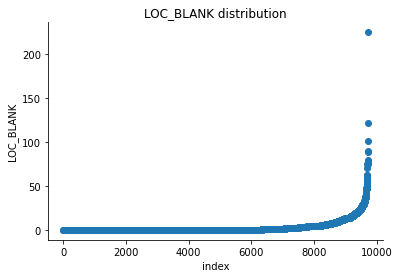

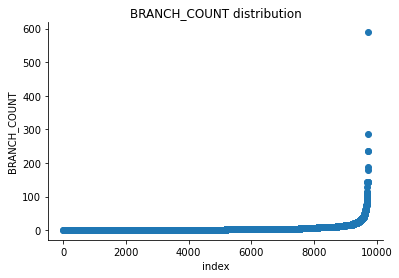

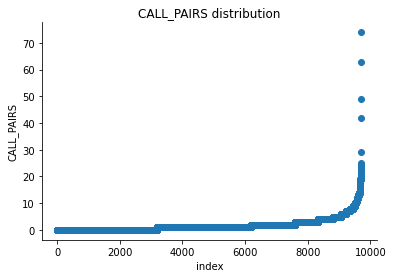

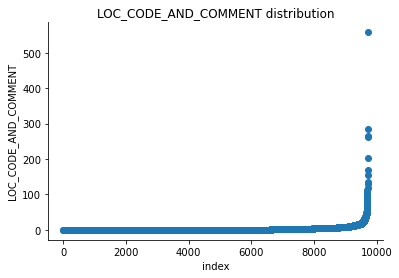

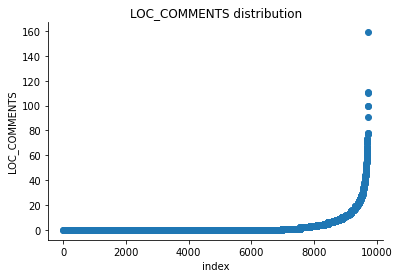

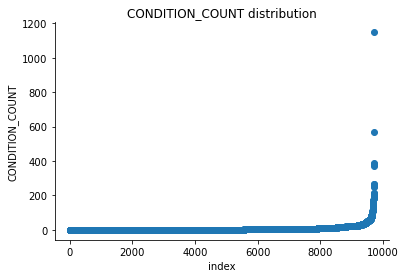

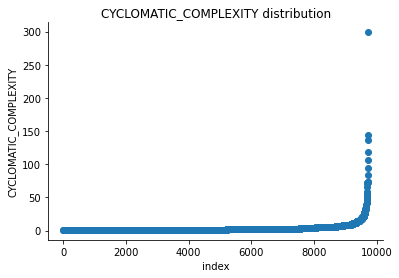

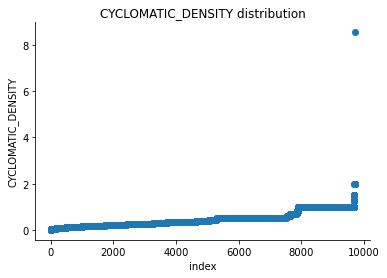

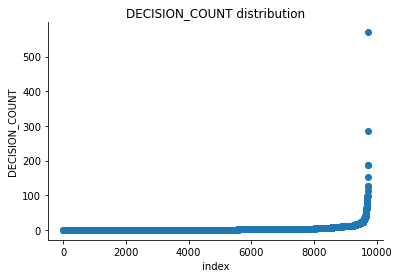

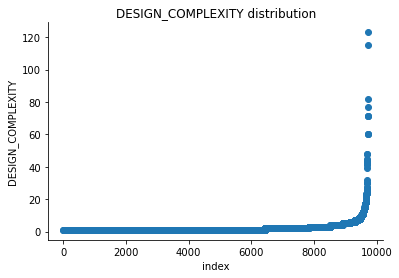

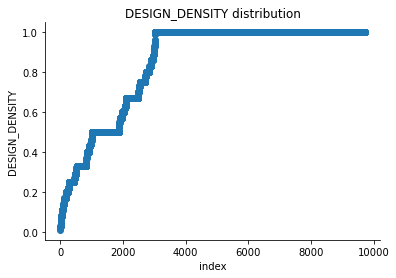

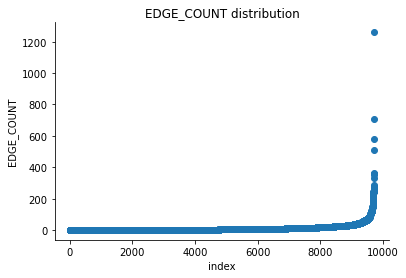

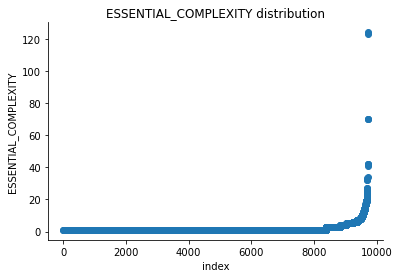

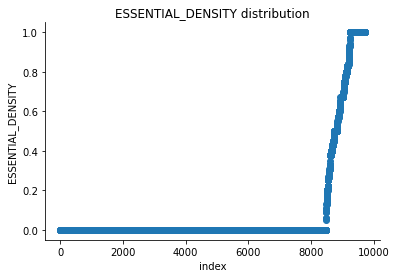

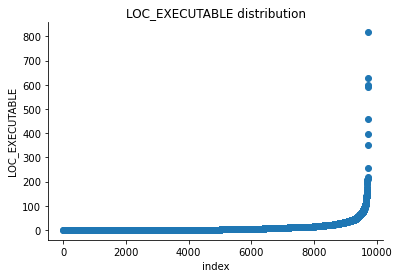

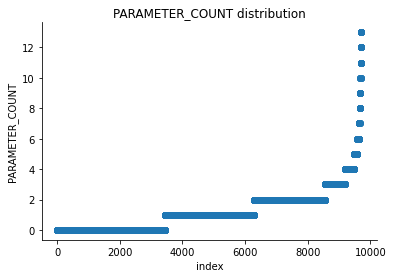

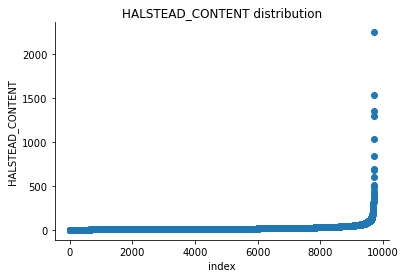

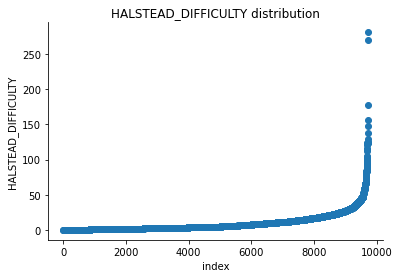

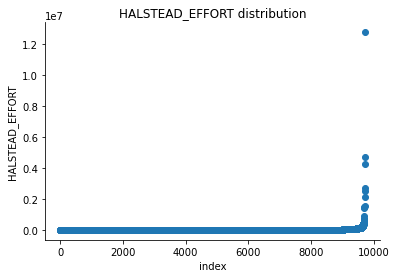

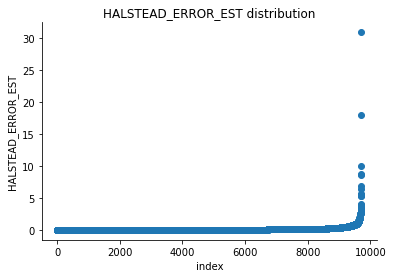

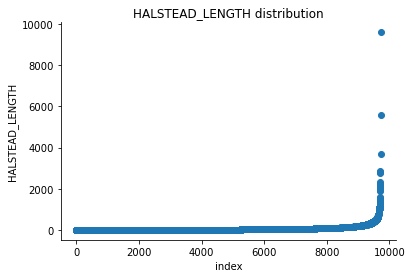

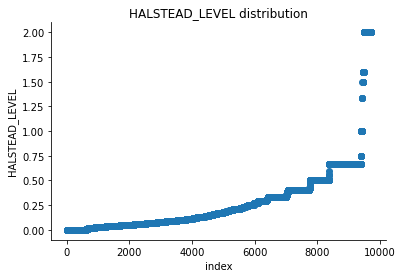

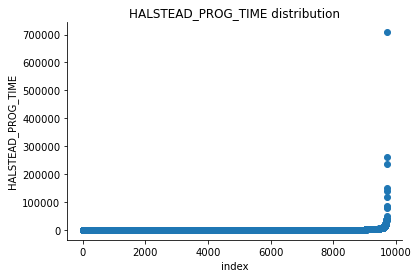

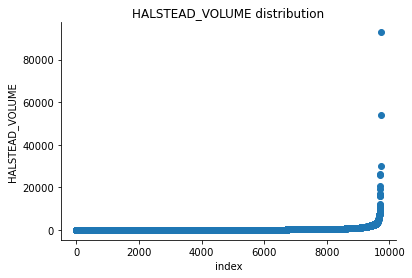

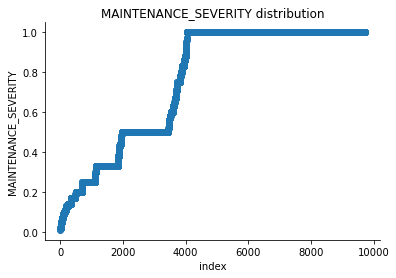

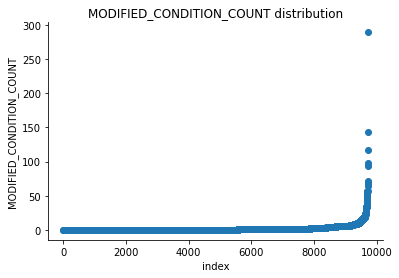

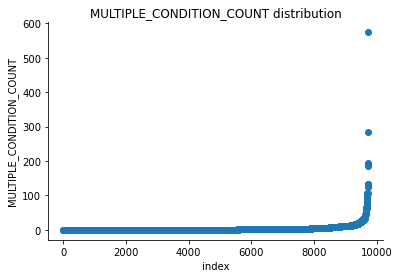

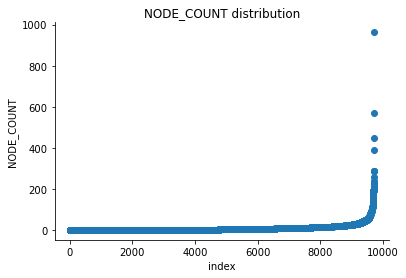

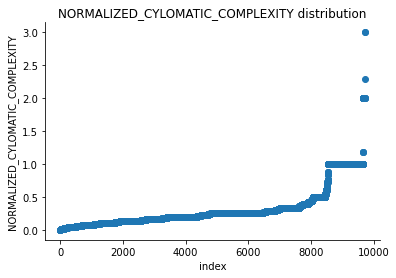

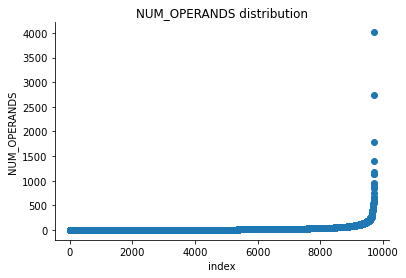

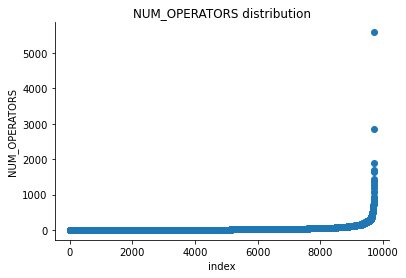

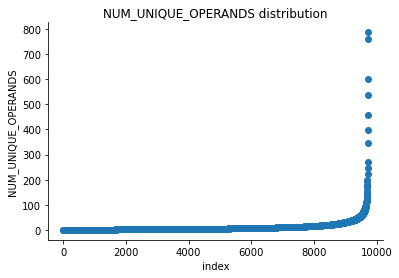

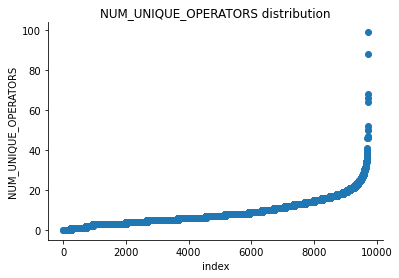

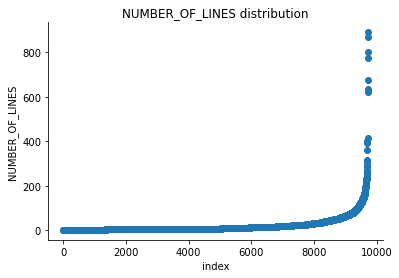

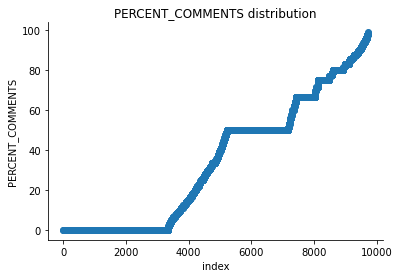

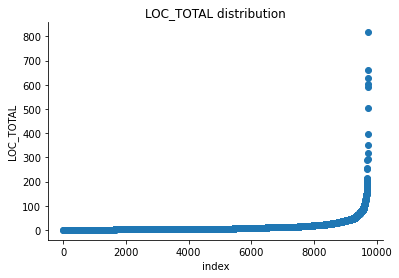

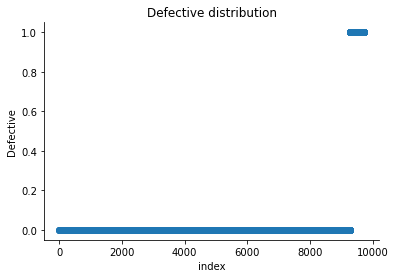

In [77]:
for i in range(len(columns)):
    plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns[i])
    plt.title(columns[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

In [85]:
'''
NOTE: Was facing the following error for DECISION_DENSITY feature:
TypeError: '<' not supported between instances of 'str' and 'float'
when the interpreter runs the following line:
plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))

So plotted the scatter plots for all the features
except DECISION_DENSITY for now.

Also it was previously checked and there are 
no missing values in the column DECISION_DENSITY of the dataframe.
'''

"\nNOTE: Was facing the following error for DECISION_DENSITY feature:\nTypeError: '<' not supported between instances of 'str' and 'float'\nwhen the interpreter runs the following line:\nplt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))\n\nSo plotted the scatter plots for all the features\nexcept DECISION_DENSITY for now.\n\nAlso it was previously checked and there are \nno missing values in the column DECISION_DENSITY of the dataframe.\n"

### Obtaining distribution plots

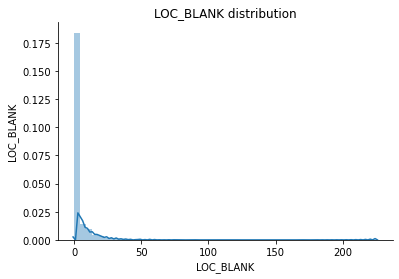

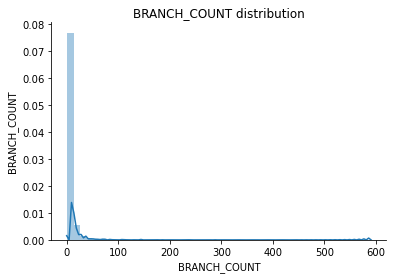

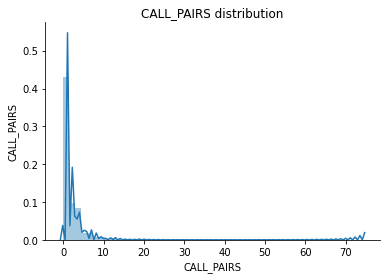

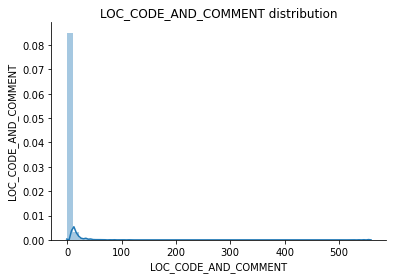

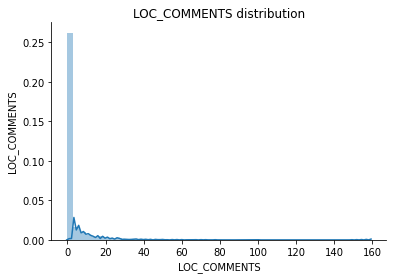

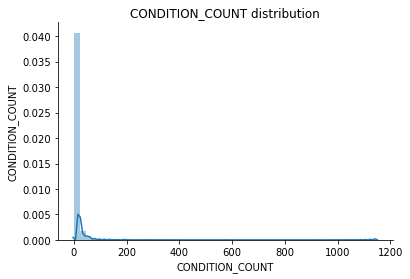

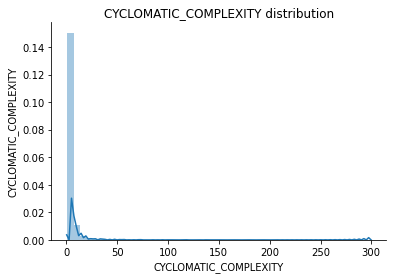

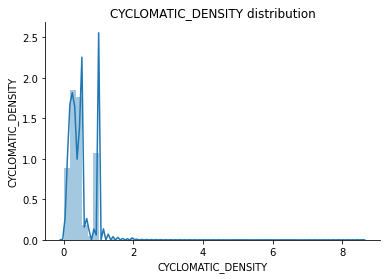

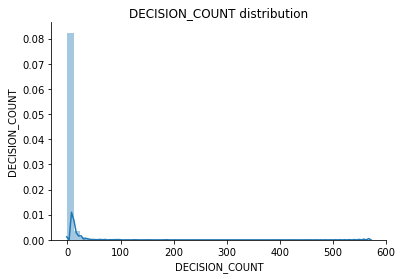

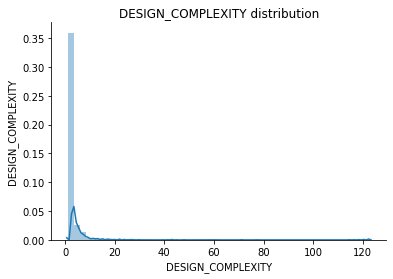

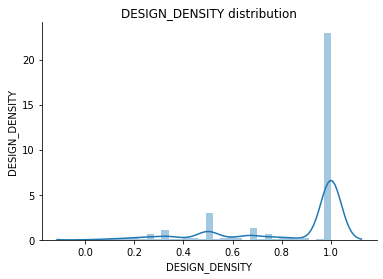

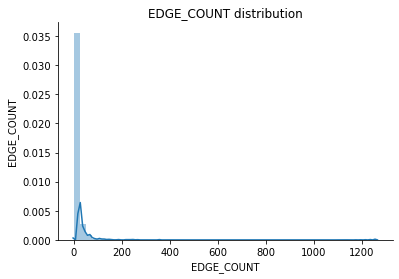

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


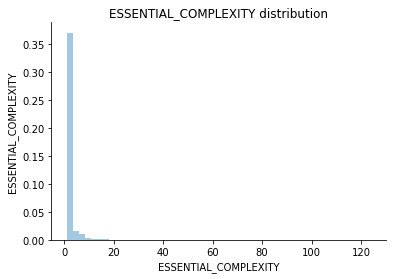

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


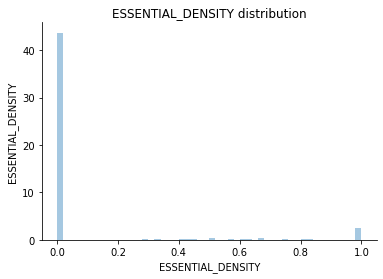

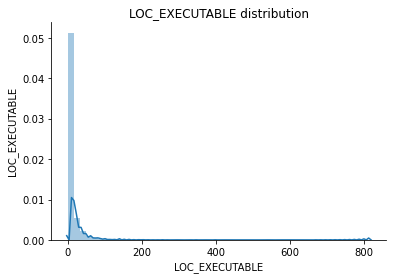

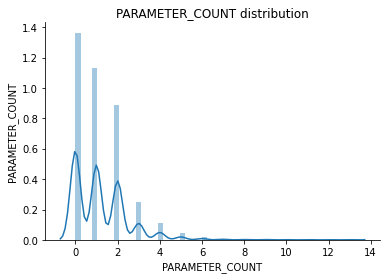

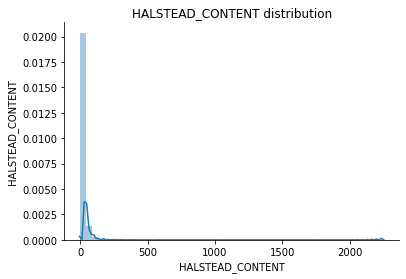

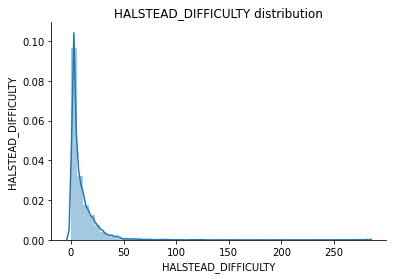

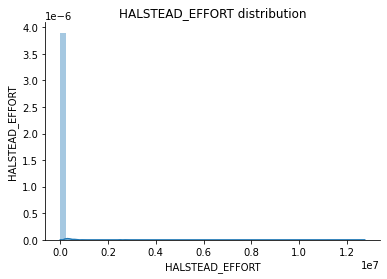

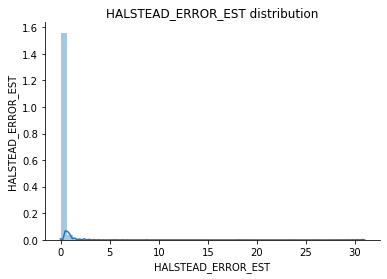

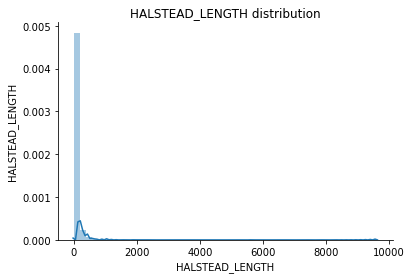

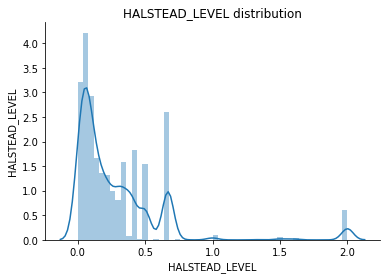

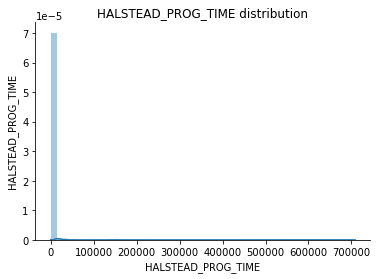

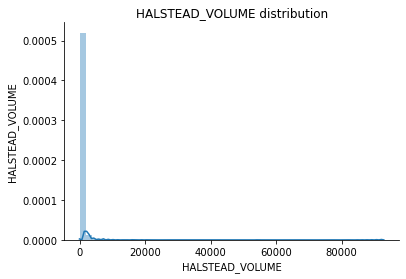

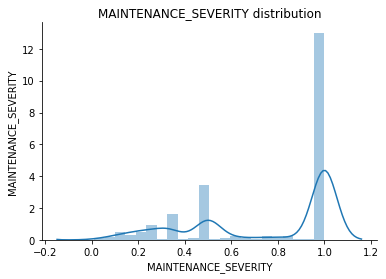

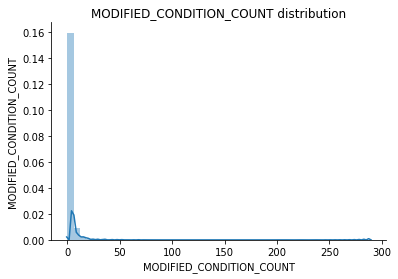

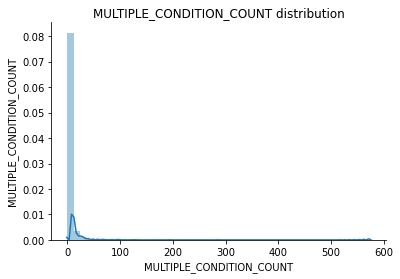

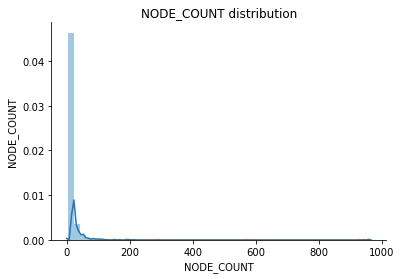

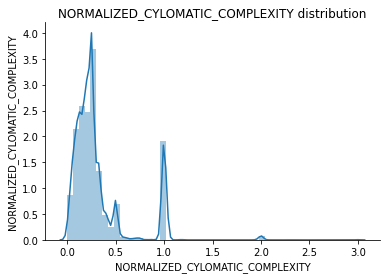

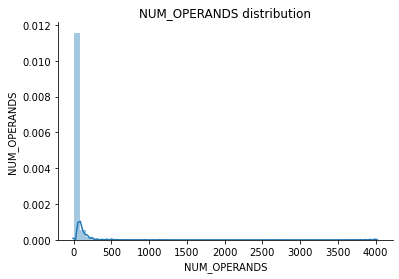

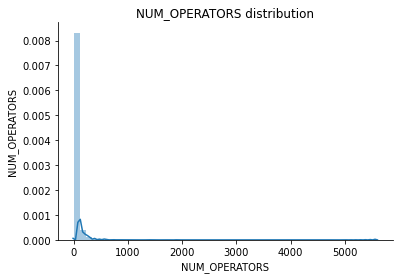

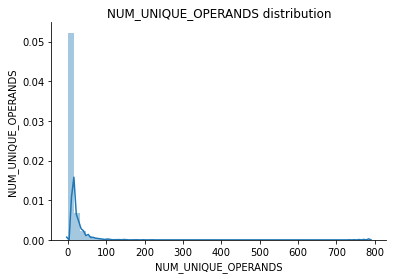

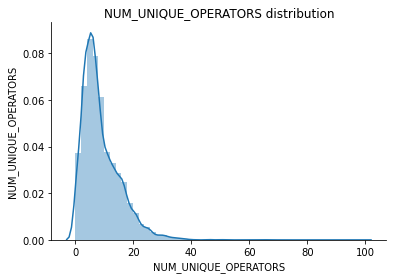

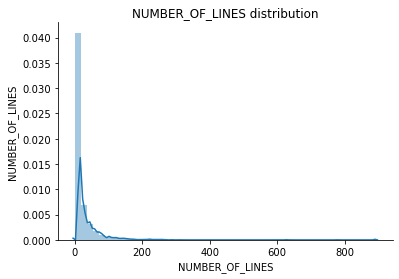

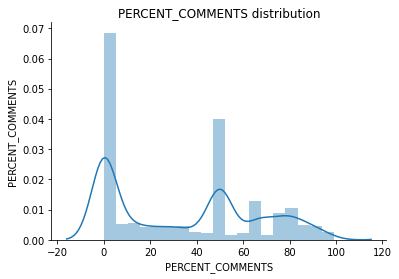

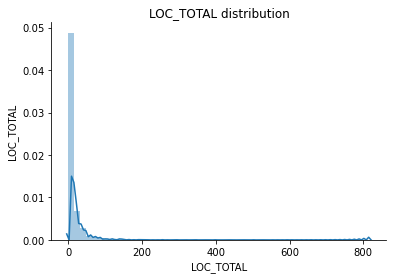

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


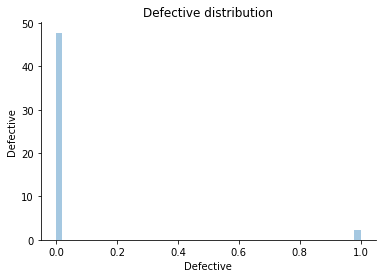

In [84]:
for i in range(len(columns)):
    #plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns[i])
    sns.distplot(df_united[columns[i]])
    plt.title(columns[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

#### From the plots we see that the datapoints with 1 value for Defective feature are easily distinguishable from other features as well.

#### So from the distributions, we can be confident that considering this problem as an unsupervised multivariate fault detection might yield good results.

### Obtaining visualizations using t-SNE which was specifically designed for visualizationg high dimensional data. The dimension of our data is 37.

#### Let's reduce the dimensions of our data to 3 and 2 and obtain visualization of the data taking two clusters: one for faulty data points and another for unflawed datapoints and visualize them.

#### Removing the label column 'Defective' from the df_united_1 dataframe to apply t-sne.

In [24]:
df_united_1 = df_united.drop(['DECISION_DENSITY', 'Defective'], axis = 1) 

In [25]:
df_united_1

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  MULTIPLE_CONDITION_COUNT  \
0                 12                  5  ...                        13   
1                  0                  1  ...                         0   
2                  2                  2  ...                         2   
3                  2                  2  ...                         2   
4                  0                  1  ...                         0   
...              ...                ...  ...                       ...   
1102               6                  2  ...                         6   
1103              12                  5  ...                        12   
1104               8                  4  ...                         9   
1105               2                  2  ...                         2   
1106               0                  1  ...                         0   

      NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  \
0             29                             0.11            42   
1              4                             0.06             8   
2              9                             0.08            12   
3              9                             0.07            12   
4              2                             0.10             4   
...          ...                              ...           ...   
1102          15                             0.10            51   
1103          38                             0.23            99   
1104          18                             0.19            52   
1105           5                             0.18             9   
1106           2                             1.00             0   

      NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0                78                   23                    16   
1                30                    4                    10   
2                25                    8                    12   
3                26                    8                    12   
4                 8                    3                     7   
...             ...                  ...                   ...   
1102             57                   16                    

In [26]:
tsne_3d = TSNE(n_components=3)

In [27]:
tsne_2d = TSNE(n_components=2)

In [28]:
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(df_united_1))

In [29]:
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(df_united_1))

In [30]:
TCs_3d

0          1          2
0      9.900491   7.497983  -6.828296
1     -2.812081 -14.982540   8.230647
2     -3.268293 -15.035191   8.196098
3     -2.649472 -16.535763   6.224325
4     -2.993340  -3.451147   6.439561
...         ...        ...        ...
9712   5.378488  10.748755  -7.821968
9713 -10.893513 -17.026207  12.537477
9714  -2.409159  13.247635 -13.944369
9715  -4.488455  -6.391150 -11.011962
9716   1.748706   7.597736 -26.263113

[9717 rows x 3 columns]

In [31]:
TCs_2d

0          1
0    -17.607294  58.873360
1     21.048107 -24.264687
2     20.804438 -24.573227
3     16.820343 -23.170361
4     37.996735 -18.114086
...         ...        ...
9712 -24.442814  55.111835
9713 -71.832100  30.823452
9714 -36.690113  46.032257
9715  -1.247191 -60.064129
9716   2.856167  82.753769

[9717 rows x 2 columns]

In [32]:
TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [33]:
TCs_3d

TC1_3d     TC2_3d     TC3_3d
0      9.900491   7.497983  -6.828296
1     -2.812081 -14.982540   8.230647
2     -3.268293 -15.035191   8.196098
3     -2.649472 -16.535763   6.224325
4     -2.993340  -3.451147   6.439561
...         ...        ...        ...
9712   5.378488  10.748755  -7.821968
9713 -10.893513 -17.026207  12.537477
9714  -2.409159  13.247635 -13.944369
9715  -4.488455  -6.391150 -11.011962
9716   1.748706   7.597736 -26.263113

[9717 rows x 3 columns]

In [34]:
TCs_2d.columns = ["TC1_2d","TC2_2d"]

In [35]:
TCs_2d

TC1_2d     TC2_2d
0    -17.607294  58.873360
1     21.048107 -24.264687
2     20.804438 -24.573227
3     16.820343 -23.170361
4     37.996735 -18.114086
...         ...        ...
9712 -24.442814  55.111835
9713 -71.832100  30.823452
9714 -36.690113  46.032257
9715  -1.247191 -60.064129
9716   2.856167  82.753769

[9717 rows x 2 columns]

In [36]:
df_united_2 = df_united.copy()
df_united_2.drop(['DECISION_DENSITY'], axis = 1, inplace = True) 
df_united_2

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NODE_COUNT  \
0                 12                  5  ...          29   
1                  0                  1  ...           4   
2                  2                  2  ...           9   
3                  2                  2  ...           9   
4                  0                  1  ...           2   
...              ...                ...  ...         ...   
1102               6                  2  ...          15   
1103              12                  5  ...          38   
1104               8                  4  ...          18   
1105               2                  2  ...           5   
1106               0                  1  ...           2   

      NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  NUM_OPERATORS  \
0                                0.11            42             78   
1                                0.06             8             30   
2                                0.08            12             25   
3                                0.07            12             26   
4                                0.10             4              8   
...                               ...           ...            ...   
1102                             0.10            51             57   
1103                             0.23            99            122   
1104                             0.19            52             59   
1105                             0.18             9             15   
1106                             1.00             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                 

In [37]:
df_united_3 = df_united.copy()
df_united_3.drop(['DECISION_DENSITY'], axis = 1, inplace = True) 
df_united_3

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NODE_COUNT  \
0                 12                  5  ...          29   
1                  0                  1  ...           4   
2                  2                  2  ...           9   
3                  2                  2  ...           9   
4                  0                  1  ...           2   
...              ...                ...  ...         ...   
1102               6                  2  ...          15   
1103              12                  5  ...          38   
1104               8                  4  ...          18   
1105               2                  2  ...           5   
1106               0                  1  ...           2   

      NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  NUM_OPERATORS  \
0                                0.11            42             78   
1                                0.06             8             30   
2                                0.08            12             25   
3                                0.07            12             26   
4                                0.10             4              8   
...                               ...           ...            ...   
1102                             0.10            51             57   
1103                             0.23            99            122   
1104                             0.19            52             59   
1105                             0.18             9             15   
1106                             1.00             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                 

In [38]:
df_united_2 = pd.concat([df_united_2, TCs_3d], axis=1, join='inner')

In [39]:
df_united_2 

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERATORS  \
0                 12                  5  ...             78   
1                  0                  1  ...             30   
2                  2                  2  ...             25   
3                  2                  2  ...             26   
4                  0                  1  ...              8   
...              ...                ...  ...            ...   
1102               6                  2  ...             57   
1103              12                  5  ...            122   
1104               8                  4  ...             59   
1105               2                  2  ...             15   
1106               0                  1  ...              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32   
1105                    8                    10               11   
1106                    0                     1                1   

      PERCENT_COMMENTS  LOC_TOTAL  Defective    TC1_3d     TC2_3d    TC3_3d  
0                31.91         36          1  9.900491   7.497983 -6.828296  
1                22.22          7          0 -2.812081 -14.982540  8.230647  
2                16.67         10          0 -3.268293 -15.035191  8.196098  
3                37.50         10          0 -2.649472 -16.535763  6.224325  
4                 0.00          4          0 -2.993340  -3.451147  6.439561  
...                ...        ...        ...       ...        ...       ...  
1102             25.71         28          0 -5.440764   7.137697 -5.498675  
1103              

In [40]:
df_united_3 = pd.concat([df_united_3, TCs_2d], axis=1, join='inner')

In [41]:
df_united_3

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERANDS  NUM_OPERATORS  \
0                 12                  5  ...            42             78   
1                  0                  1  ...             8             30   
2                  2                  2  ...            12             25   
3                  2                  2  ...            12             26   
4                  0                  1  ...             4              8   
...              ...                ...  ...           ...            ...   
1102               6                  2  ...            51             57   
1103              12                  5  ...            99            122   
1104               8                  4  ...            52             59   
1105               2                  2  ...             9             15   
1106               0                  1  ...             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32   
1105                    8                    10               11   
1106                    0                     1                1   

      PERCENT_COMMENTS  LOC_TOTAL  Defective     TC1_2d     TC2_2d  
0                31.91         36          1 -17.607294  58.873360  
1                22.22          7          0  21.048107 -24.264687  
2                16.67         10          0  20.804438 -24.573227  
3                37.50         10          0  16.820343 -23.170361  
4                 0.00          4          0  37.996735 -18.114086  
...                ...        ...        ...        ...     

In [42]:
cluster0 = df_united_2[df_united_2["Defective"] == 0]
cluster1 = df_united_2[df_united_2["Defective"] == 1]

In [43]:
cluster0_2d = df_united_3[df_united_3["Defective"] == 0]
cluster1_2d = df_united_3[df_united_3["Defective"] == 1]

In [44]:
cluster0

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
5             9             1           4                     0             3   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
5                   0                      1                0.13   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERATORS  \
1                  0                  1  ...             30   
2                  2                  2  ...             25   
3                  2                  2  ...             26   
4                  0                  1  ...              8   
5                  0                  1  ...             15   
...              ...                ...  ...            ...   
1102               6                  2  ...             57   
1103              12                  5  ...            122   
1104               8                  4  ...             59   
1105               2                  2  ...             15   
1106               0                  1  ...              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
5                       7                     7               22   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32   
1105                    8                    10               11   
1106                    0                     1                1   

      PERCENT_COMMENTS  LOC_TOTAL  Defective    TC1_3d     TC2_3d    TC3_3d  
1                22.22          7          0 -2.812081 -14.982540  8.230647  
2                16.67         10          0 -3.268293 -15.035191  8.196098  
3                37.50         10          0 -2.649472 -16.535763  6.224325  
4                 0.00          4          0 -2.993340  -3.451147  6.439561  
5                27.27          8          0  4.610284 -13.277706 -3.978154  
...                ...        ...        ...       ...        ...       ...  
1102             25.71         28          0 -5.440764   7.137697 -5.498675  
1103              

In [45]:
cluster1

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
6             8             3           4                     9             5   
10            4             1           1                     1             2   
11            6             3           1                     1             1   
17            6             3           1                     1             1   
...         ...           ...         ...                   ...           ...   
1044          0             1           2                     0             0   
1045          0             1           2                     0             0   
1046          0             1           2                     0             0   
1047          0             1           2                     0             0   
1048          0             1           2                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
6                   4                      2                0.11   
10                  0                      1                0.33   
11                  4                      2                0.12   
17                  4                      2                0.20   
...               ...                    ...                 ...   
1044                0                      1                0.17   
1045                0                      1                0.20   
1046                0                      1                0.20   
1047                0                      1                0.20   
1048                0                      1                0.20   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERATORS  \
0                 12                  5  ...             78   
6                  2                  2  ...             46   
10                 0                  1  ...              8   
11                 2                  1  ...             39   
17                 2                  1  ...             40   
...              ...                ...  ...            ...   
1044               0                  1  ...              6   
1045               0                  1  ...              6   
1046               0                  1  ...              6   
1047               0                  1  ...              6   
1048               0                  1  ...              6   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
6                      15                    13               34   
10                      3                     6               11   
11                      9                    11               26   
17                      8                    11               19   
...                   ...                   ...              ...   
1044                    5                     4                7   
1045                    5                     4                6   
1046                    5                     4                6   
1047                    5                     4                6   
1048                    5                     4                6   

      PERCENT_COMMENTS  LOC_TOTAL  Defective     TC1_3d     TC2_3d     TC3_3d  
0                31.91         36          1   9.900491   7.497983  -6.828296  
6                58.33         19          1   1.728107  -5.052927 -18.716105  
10               60.00          3          1   2.258130   3.836970   7.399975  
11               11.11         17          1  16.917704 -12.803530 -11.677535  
17               18.18         10          1  17.600941 -13.997985  -9.082935  
...                ...        ...        ...        ...        ...        ...  
1044              0.00          6          1  -2.790147   0.813632  27.566502  
10

In [46]:
cluster0_2d

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
5             9             1           4                     0             3   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
5                   0                      1                0.13   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERANDS  NUM_OPERATORS  \
1                  0                  1  ...             8             30   
2                  2                  2  ...            12             25   
3                  2                  2  ...            12             26   
4                  0                  1  ...             4              8   
5                  0                  1  ...             8             15   
...              ...                ...  ...           ...            ...   
1102               6                  2  ...            51             57   
1103              12                  5  ...            99            122   
1104               8                  4  ...            52             59   
1105               2                  2  ...             9             15   
1106               0                  1  ...             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
5                       7                     7               22   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32   
1105                    8                    10               11   
1106                    0                     1                1   

      PERCENT_COMMENTS  LOC_TOTAL  Defective     TC1_2d     TC2_2d  
1                22.22          7          0  21.048107 -24.264687  
2                16.67         10          0  20.804438 -24.573227  
3                37.50         10          0  16.820343 -23.170361  
4                 0.00          4          0  37.996735 -18.114086  
5                27.27          8          0 -13.974348 -40.847984  
...                ...        ...        ...        ...     

In [47]:
cluster1_2d

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
6             8             3           4                     9             5   
10            4             1           1                     1             2   
11            6             3           1                     1             1   
17            6             3           1                     1             1   
...         ...           ...         ...                   ...           ...   
1044          0             1           2                     0             0   
1045          0             1           2                     0             0   
1046          0             1           2                     0             0   
1047          0             1           2                     0             0   
1048          0             1           2                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
6                   4                      2                0.11   
10                  0                      1                0.33   
11                  4                      2                0.12   
17                  4                      2                0.20   
...               ...                    ...                 ...   
1044                0                      1                0.17   
1045                0                      1                0.20   
1046                0                      1                0.20   
1047                0                      1                0.20   
1048                0                      1                0.20   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERANDS  NUM_OPERATORS  \
0                 12                  5  ...            42             78   
6                  2                  2  ...            23             46   
10                 0                  1  ...             3              8   
11                 2                  1  ...            17             39   
17                 2                  1  ...            15             40   
...              ...                ...  ...           ...            ...   
1044               0                  1  ...             5              6   
1045               0                  1  ...             5              6   
1046               0                  1  ...             5              6   
1047               0                  1  ...             5              6   
1048               0                  1  ...             5              6   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
6                      15                    13               34   
10                      3                     6               11   
11                      9                    11               26   
17                      8                    11               19   
...                   ...                   ...              ...   
1044                    5                     4                7   
1045                    5                     4                6   
1046                    5                     4                6   
1047                    5                     4                6   
1048                    5                     4                6   

      PERCENT_COMMENTS  LOC_TOTAL  Defective     TC1_2d     TC2_2d  
0                31.91         36          1 -17.607294  58.873360  
6                58.33         19          1 -23.210913 -11.694839  
10               60.00          3          1  23.607862  19.457380  
11               11.11         17          1 -43.061054   2.600037  
17               18.18         10          1 -40.170826   5.010720  
...                ...        ...        ...        ...     

In [48]:
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Unflawed",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

In [49]:
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Flawed",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

In [50]:
trace1_2d = go.Scatter(
                    x = cluster0_2d["TC1_2d"],
                    y = cluster0_2d["TC2_2d"],
                    mode = "markers",
                    name = "Unflawed",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

In [51]:
trace2_2d = go.Scatter(
                    x = cluster1_2d["TC1_2d"],
                    y = cluster1_2d["TC2_2d"],
                    mode = "markers",
                    name = "Flawed",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

In [52]:
data = [trace1, trace2]
title = "Visualizing Clusters in Three Dimensions Using T-SNE"
layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [53]:
data = [trace1_2d, trace2_2d]
title = "Visualizing Clusters in Two Dimensions Using T-SNE"
layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

#### From the visualizations, we understand that reducing the dimensions to 2 and 3 is resulting in a very large loss of information and hence the outliers are not distinctive from the unflaawed data points at all.

#### Hence we can say that reducing the dimensions rigorously is not good in the case of outlier detection.

#### So we need to further experiment to find out the optimal number of dimensions which will help in detecting the outliers. It might also be possible that not reducing the dimensions gives the best results.

#### Now since we are considering the faulty data points as outliers which are to be detected using the features in the data, our problem can now be called as 

### Unsupervised Multivariate anomaly detection.

In [54]:
df_united_unlabelled = df_united.copy()
df_united_unlabelled.drop(['Defective', 'DECISION_DENSITY'], axis = 1, inplace = True) 
df_united_unlabelled

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  MULTIPLE_CONDITION_COUNT  \
0                 12                  5  ...                        13   
1                  0                  1  ...                         0   
2                  2                  2  ...                         2   
3                  2                  2  ...                         2   
4                  0                  1  ...                         0   
...              ...                ...  ...                       ...   
1102               6                  2  ...                         6   
1103              12                  5  ...                        12   
1104               8                  4  ...                         9   
1105               2                  2  ...                         2   
1106               0                  1  ...                         0   

      NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  \
0             29                             0.11            42   
1              4                             0.06             8   
2              9                             0.08            12   
3              9                             0.07            12   
4              2                             0.10             4   
...          ...                              ...           ...   
1102          15                             0.10            51   
1103          38                             0.23            99   
1104          18                             0.19            52   
1105           5                             0.18             9   
1106           2                             1.00             0   

      NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0                78                   23                    16   
1                30                    4                    10   
2                25                    8                    12   
3                26                    8                    12   
4                 8                    3                     7   
...             ...                  ...                   ...   
1102             57                   16                    

In [55]:
df_target = pd.DataFrame(df_united['Defective'])

In [56]:
df_target

Defective
0             1
1             0
2             0
3             0
4             0
...         ...
1102          0
1103          0
1104          0
1105          0
1106          0

[9717 rows x 1 columns]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_united_unlabelled, df_target, test_size=0.2, random_state=42)

In [58]:
X_train

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
3328          0            21           9                    21             0   
1536          1             7           0                     0             0   
4480          0             7           0                     1             0   
4569          0             1           1                     2             0   
3456          0             1           1                     0             0   
...         ...           ...         ...                   ...           ...   
4276          0             1           0                     3             0   
3733          0             3           2                     2             0   
3932          0             3           0                     3             1   
860           5             1           2                     0             9   
223           3            11           3                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
3328               32                     11                0.44   
1536               12                      4                0.22   
4480               12                      4                2.00   
4569                0                      1                0.33   
3456                0                      1                1.00   
...               ...                    ...                 ...   
4276                0                      1                0.25   
3733                4                      2                0.67   
3932                4                      2                0.50   
860                 0                      1                0.25   
223                12                      7                0.30   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  MULTIPLE_CONDITION_COUNT  \
3328              12                  7  ...                        16   
1536               6                  1  ...                         6   
4480               6                  1  ...                         6   
4569               0                  1  ...                         0   
3456               0                  1  ...                         0   
...              ...                ...  ...                       ...   
4276               0                  1  ...                         0   
3733               2                  2  ...                         2   
3932               2                  1  ...                         2   
860                0                  1  ...                         0   
223                6                  4  ...                         6   

      NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  \
3328          35                             0.39            50   
1536          12                             0.20            22   
4480          10                             1.00            10   
4569           3                             0.20             4   
3456           3                             1.00             3   
...          ...                              ...           ...   
4276           2                             0.17             4   
3733           8                             0.40             8   
3932           6                             0.29             8   
860            4                             0.05             7   
223           20                             0.26            43   

      NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
3328             64                   19                    17   
1536             26                   16                     8   
4480             11                    3                     6   
4569              9                    2                     8   
3456              5                    3                     5   
...             ...                  ...                   ...   
4276             11                    3                    

In [59]:
y_train

Defective
3328          0
1536          0
4480          0
4569          0
3456          0
...         ...
4276          0
3733          0
3932          0
860           0
223           0

[7773 rows x 1 columns]

In [60]:
X_test

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
4451          0             1           0                     1             0   
2890          0             1           3                     3             0   
1111          2             1           3                     0             6   
597           0             3           2                     2             0   
3685          0             1           1                     1             0   
...         ...           ...         ...                   ...           ...   
4936          0             1           0                     1             0   
281           0             3           1                     2             0   
337           0             3           1                     0             0   
336           2             9           1                     0             0   
5047          0            21           8                    31            13   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
4451                0                      1                0.50   
2890                0                      1                0.25   
1111                0                      1                0.07   
597                 4                      2                0.67   
3685                0                      1                0.50   
...               ...                    ...                 ...   
4936                0                      1                0.50   
281                 4                      2                0.67   
337                 4                      2                0.33   
336                14                      5                0.63   
5047               38                     11                0.31   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  MULTIPLE_CONDITION_COUNT  \
4451               0                  1  ...                         0   
2890               0                  1  ...                         0   
1111               0                  1  ...                         0   
597                2                  2  ...                         2   
3685               0                  1  ...                         0   
...              ...                ...  ...                       ...   
4936               0                  1  ...                         0   
281                2                  2  ...                         2   
337                2                  2  ...                         2   
336                6                  4  ...                         7   
5047              18                  9  ...                        19   

      NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  \
4451           2                             0.25             1   
2890           5                             0.17             6   
1111          11                             0.04            22   
597            6                             0.40             7   
3685           3                             0.20             5   
...          ...                              ...           ...   
4936           2                             0.25             1   
281            6                             0.40             5   
337            6                             0.29            13   
336           15                             0.45            13   
5047          35                             0.22            47   

      NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
4451              3                    1                     3   
2890              7                    5                     4   
1111             40                   12                     7   
597              10                    4                     8   
3685              6                    5                     5   
...             ...                  ...                   ...   
4936              3                    1                    

In [63]:
y_test

Defective
4451          0
2890          0
1111          0
597           0
3685          0
...         ...
4936          0
281           0
337           0
336           0
5047          0

[1944 rows x 1 columns]

### Applying isolation forest

In [64]:
contamination = 0.05
model = IsolationForest(contamination = contamination, n_estimators=100)
model.fit(df_united_unlabelled)

IsolationForest(contamination=0.05)

In [67]:
df_united_unlabelled["iforest"] = pd.Series(model.predict(df_united_unlabelled))
df_united_unlabelled["iforest"] = df_united_unlabelled["iforest"].map({1:0, -1:1})

In [68]:
df_united_unlabelled

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NODE_COUNT  \
0                 12                  5  ...          29   
1                  0                  1  ...           4   
2                  2                  2  ...           9   
3                  2                  2  ...           9   
4                  0                  1  ...           2   
...              ...                ...  ...         ...   
1102               6                  2  ...          15   
1103              12                  5  ...          38   
1104               8                  4  ...          18   
1105               2                  2  ...           5   
1106               0                  1  ...           2   

      NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  NUM_OPERATORS  \
0                                0.11            42             78   
1                                0.06             8             30   
2                                0.08            12             25   
3                                0.07            12             26   
4                                0.10             4              8   
...                               ...           ...            ...   
1102                             0.10            51             57   
1103                             0.23            99            122   
1104                             0.19            52             59   
1105                             0.18             9             15   
1106                             1.00             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                 

In [62]:
isolation_forest_model = IsolationForest(random_state = 42).fit(X_train)

In [37]:
isolation_forest_predictions = pd.DataFrame(isolation_forest_model.predict(X_test))
isolation_forest_predictions.columns = ["Prediced_defective"]
isolation_forest_predictions['scores'] = isolation_forest_model.decision_function(X_test)
isolation_forest_predictions

Prediced_defective    scores
0                      1  0.157243
1                      1  0.147088
2                      1  0.112913
3                      1  0.131686
4                      1  0.162532
...                  ...       ...
1939                   1  0.157243
1940                   1  0.128129
1941                   1  0.133524
1942                   1  0.049181
1943                  -1 -0.049854

[1944 rows x 2 columns]

####  In the predicted dataframe, anomaly column values are -1 and the corresponding scores are negative.
#### Changing 1 values to 0 and -1 values to 1, so that evaluation of the model can be done.

In [38]:
isolation_forest_predictions['Prediced_defective'] = isolation_forest_predictions['Prediced_defective'].replace([1],0)
isolation_forest_predictions['Prediced_defective'] = isolation_forest_predictions['Prediced_defective'].replace([-1],1)

In [39]:
isolation_forest_predictions

Prediced_defective    scores
0                      0  0.157243
1                      0  0.147088
2                      0  0.112913
3                      0  0.131686
4                      0  0.162532
...                  ...       ...
1939                   0  0.157243
1940                   0  0.128129
1941                   0  0.133524
1942                   0  0.049181
1943                   1 -0.049854

[1944 rows x 2 columns]

In [40]:
df_test_predictions_combined = y_test.copy()
df_test_predictions_combined.reset_index(level=0, inplace=True)
df_test_predictions_combined

index  Defective
0      4451          0
1      2890          0
2      1111          0
3       597          0
4      3685          0
...     ...        ...
1939   4936          0
1940    281          0
1941    337          0
1942    336          0
1943   5047          0

[1944 rows x 2 columns]

In [69]:
df_united_unlabelled['ground_truth'] = df_target

In [70]:
df_united_unlabelled

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0                 12                  5  ...                             0.11   
1                  0                  1  ...                             0.06   
2                  2                  2  ...                             0.08   
3                  2                  2  ...                             0.07   
4                  0                  1  ...                             0.10   
...              ...                ...  ...                              ...   
1102               6                  2  ...                             0.10   
1103              12                  5  ...                             0.23   
1104               8                  4  ...                             0.19   
1105               2                  2  ...                             0.18   
1106               0                  1  ...                             1.00   

      NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0               42             78                   23                    16   
1                8             30                    4                    10   
2               12             25                    8                    12   
3               12             26                    8                    12   
4                4              8                    3                     7   
...            ...            ...                  ...                   ...   
1102            51             57                   16                    12   
1103            99            122                   45                    26   
1104            52             59                   20                    15   
1105             9             15                    8                    10   
1106             0              1                    0                     1   

      NUMBER_OF_LINES  PERCENT_COMMENTS  LOC_TOTAL  iforest  ground_truth  
0                  71             31.91         36        0             1  
1                  18             22.22          7        0             0  
2                  24             16.67         10    

In [71]:
df_united_unlabelled['sum'] = df_united_unlabelled['ground_truth'] + df_united_unlabelled['iforest']
df_united_unlabelled

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERANDS  NUM_OPERATORS  \
0                 12                  5  ...            42             78   
1                  0                  1  ...             8             30   
2                  2                  2  ...            12             25   
3                  2                  2  ...            12             26   
4                  0                  1  ...             4              8   
...              ...                ...  ...           ...            ...   
1102               6                  2  ...            51             57   
1103              12                  5  ...            99            122   
1104               8                  4  ...            52             59   
1105               2                  2  ...             9             15   
1106               0                  1  ...             0              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32   
1105                    8                    10               11   
1106                    0                     1                1   

      PERCENT_COMMENTS  LOC_TOTAL  iforest  ground_truth  sum  
0                31.91         36        0             1    1  
1                22.22          7        0             0    0  
2                16.67         10        0             0    0  
3                37.50         10        0             0    0  
4                 0.00          4        0             0    0  
...                ...        ...      ...           ...  ...  
1102             25.71    

In [72]:
df_united_unlabelled['predicted_minus_predicted'] = df_united_unlabelled['ground_truth'] - df_united_unlabelled['iforest']
df_united_unlabelled

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            22            15           9                     4            11   
1             7             1           2                     0             2   
2            10             3           2                     0             2   
3             9             3           2                     0             6   
4             3             1           0                     0             0   
...         ...           ...         ...                   ...           ...   
1102          6             7           2                     2             7   
1103          4            20           8                     2             2   
1104          4            11           4                     0             3   
1105          2             3           1                     0             1   
1106          0             1           0                     0             0   

      CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0                  26                      8                0.22   
1                   0                      1                0.14   
2                   4                      2                0.20   
3                   4                      2                0.20   
4                   0                      1                0.25   
...               ...                    ...                 ...   
1102               12                      4                0.14   
1103               24                     12                0.27   
1104               18                      6                0.25   
1105                4                      2                0.29   
1106                0                      1                1.00   

      DECISION_COUNT  DESIGN_COMPLEXITY  ...  NUM_OPERATORS  \
0                 12                  5  ...             78   
1                  0                  1  ...             30   
2                  2                  2  ...             25   
3                  2                  2  ...             26   
4                  0                  1  ...              8   
...              ...                ...  ...            ...   
1102               6                  2  ...             57   
1103              12                  5  ...            122   
1104               8                  4  ...             59   
1105               2                  2  ...             15   
1106               0                  1  ...              1   

      NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  NUMBER_OF_LINES  \
0                      23                    16               71   
1                       4                    10               18   
2                       8                    12               24   
3                       8                    12               27   
4                       3                     7               10   
...                   ...                   ...              ...   
1102                   16                    12               42   
1103                   45                    26               52   
1104                   20                    15               32   
1105                    8                    10               11   
1106                    0                     1                1   

      PERCENT_COMMENTS  LOC_TOTAL  iforest  ground_truth  sum  \
0                31.91         36        0             1    1   
1                22.22          7        0             0    0   
2                16.67         10        0             0    0   
3                37.50         10        0             0    0   
4                 0.00          4        0             0    0   
...                ...        ...      ...           ...  ...   
1102             25.71         28        0             0    0   
1103              8.51         45        0             0    0   
1104             11.11         24        0             0 

In [41]:
df_test_predictions_combined = pd.concat([df_test_predictions_combined, isolation_forest_predictions], axis=1, join='inner')
df_test_predictions_combined['sum'] = df_test_predictions_combined['Defective'] + df_test_predictions_combined['Prediced_defective']
df_test_predictions_combined

index  Defective  Prediced_defective    scores  sum
0      4451          0                   0  0.157243    0
1      2890          0                   0  0.147088    0
2      1111          0                   0  0.112913    0
3       597          0                   0  0.131686    0
4      3685          0                   0  0.162532    0
...     ...        ...                 ...       ...  ...
1939   4936          0                   0  0.157243    0
1940    281          0                   0  0.128129    0
1941    337          0                   0  0.133524    0
1942    336          0                   0  0.049181    0
1943   5047          0                   1 -0.049854    1

[1944 rows x 5 columns]

In [42]:
df_test_predictions_combined['predicted_minus_predicted'] = df_test_predictions_combined['Defective'] - df_test_predictions_combined['Prediced_defective']
df_test_predictions_combined

index  Defective  Prediced_defective    scores  sum  \
0      4451          0                   0  0.157243    0   
1      2890          0                   0  0.147088    0   
2      1111          0                   0  0.112913    0   
3       597          0                   0  0.131686    0   
4      3685          0                   0  0.162532    0   
...     ...        ...                 ...       ...  ...   
1939   4936          0                   0  0.157243    0   
1940    281          0                   0  0.128129    0   
1941    337          0                   0  0.133524    0   
1942    336          0                   0  0.049181    0   
1943   5047          0                   1 -0.049854    1   

      predicted_minus_predicted  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
1939                          0  
1940                          0  
1941                          0  
1942                          0  
1943                         -1  

[1944 rows x 6 columns]

#### Finding the accuracy of the isolation forest model:

In [43]:
true_positives = len(df_test_predictions_combined[df_test_predictions_combined['sum'] == 2])
true_positives

44

In [73]:
true_positives = len(df_united_unlabelled[df_united_unlabelled['sum'] == 2])
true_positives

51

In [44]:
true_negatives = len(df_test_predictions_combined[df_test_predictions_combined['sum'] == 0])
true_negatives

1661

In [74]:
true_negatives = len(df_united_unlabelled[df_united_unlabelled['sum'] == 0])
true_negatives

8746

In [ ]:
all_samples = df_test_predictions_combined.shape[0]
all_samples

In [76]:
all_samples = df_united_unlabelled.shape[0]
all_samples

9717

In [46]:
false_positives = len(df_test_predictions_combined[df_test_predictions_combined['predicted_minus_predicted'] == -1])
false_positives

180

In [77]:
false_positives = len(df_united_unlabelled[df_united_unlabelled['predicted_minus_predicted'] == -1])
false_positives

534

In [47]:
false_negatives = len(df_test_predictions_combined[df_test_predictions_combined['predicted_minus_predicted'] == 1])
false_negatives

59

In [78]:
false_negatives = len(df_united_unlabelled[df_united_unlabelled['predicted_minus_predicted'] == 1])
false_negatives

386

In [48]:
print("Accuracy percentage:", 100*(true_positives + true_negatives)/all_samples, '%')

Accuracy percentage: 87.70576131687243 %


In [79]:
print("Accuracy percentage:", 100*(true_positives + true_negatives)/all_samples, '%')

Accuracy percentage: 90.53205721930637 %


### Therefore the accuracy obtained by outlier detection using Isolation Forest for unsupervised learning is 87.70576131687243 % 

### To be noted that we have not applied any feature scaling, feature selection and did not finetune the Isolation Forest model with different hyperparameters.